In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch

# Load the model to CPU
model_pth = '/content/drive/MyDrive/Colab Notebooks/archive/model1.pth'
model = torch.load(model_pth, map_location=torch.device('cuda'))


In [ ]:
# Saat melatih, simpan model.state_dict()
torch.save(model, '/content/drive/MyDrive/Colab Notebooks/archive/model1.pth')

# Saat memuat, muat state_dict (jika perlu)
loaded_model = torch.load('/content/drive/MyDrive/Colab Notebooks/archive/model1.pth', map_location=torch.device('cpu'))


In [ ]:
import torch
from torchvision import models

# Define YourModelClass with the same architecture as the saved model
class YourModelClass(torch.nn.Module):
    def __init__(self):
        super(YourModelClass, self).__init__()
        # Modify the architecture to match the saved model

# Create an instance of YourModelClass
model = YourModelClass()

# Load the saved state_dict
state_dict_path = '/content/drive/MyDrive/Colab Notebooks/final dataset used for oil spill/model_state_dict.pth'
state_dict = torch.load(state_dict_path, map_location=torch.device('cpu'))

# Check the keys in the state_dict
print(state_dict.keys())

# Print the architecture of YourModelClass
print(model)


odict_keys(['mnet.features.0.weight', 'mnet.features.0.bias', 'mnet.features.2.weight', 'mnet.features.2.bias', 'mnet.features.5.weight', 'mnet.features.5.bias', 'mnet.features.7.weight', 'mnet.features.7.bias', 'mnet.features.10.weight', 'mnet.features.10.bias', 'mnet.features.12.weight', 'mnet.features.12.bias', 'mnet.features.14.weight', 'mnet.features.14.bias', 'mnet.features.17.weight', 'mnet.features.17.bias', 'mnet.features.19.weight', 'mnet.features.19.bias', 'mnet.features.21.weight', 'mnet.features.21.bias', 'mnet.features.24.weight', 'mnet.features.24.bias', 'mnet.features.26.weight', 'mnet.features.26.bias', 'mnet.features.28.weight', 'mnet.features.28.bias', 'mnet.classifier.0.weight', 'mnet.classifier.0.bias', 'mnet.classifier.3.weight', 'mnet.classifier.3.bias', 'mnet.classifier.6.weight', 'mnet.classifier.6.bias'])
YourModelClass()


In [ ]:
# Assuming state_dict is your loaded state_dict
keys_to_remove = []
for key in state_dict.keys():
    if 'mnet' in key:
        keys_to_remove.append(key)

for key in keys_to_remove:
    del state_dict[key]


In [ ]:
import torch
import torch.nn as nn
from torchvision.models import vgg16

# Load pre-trained VGG16 model
vgg16_model = vgg16(pretrained=True)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:07<00:00, 77.7MB/s]


In [ ]:
class YourModelClass(nn.Module):
    def __init__(self):
        super(YourModelClass, self).__init__()
        # Define your model architecture here
        # Example: Remove the last classification layer of VGG16
        self.features = vgg16_model.features
        self.classifier = nn.Sequential(
            nn.Linear(25088, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            # The output layer should match the number of classes in your training
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        # Define the forward pass
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x


Saving non oil spill3.jpg to non oil spill3.jpg


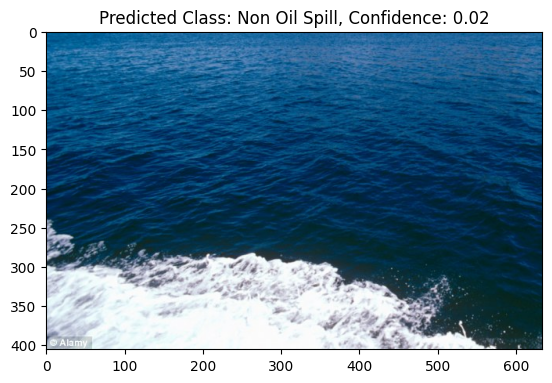

In [ ]:
from PIL import Image
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from google.colab import files

# Upload the image using files.upload()
uploaded = files.upload()

# Get the first uploaded image
uploaded_image_path = next(iter(uploaded.keys()))

# Load the image from the user upload
img = Image.open(uploaded_image_path)

# Define image transformations for the PyTorch model
transform_torch = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Apply the transformations to the image
input_image_torch = transform_torch(img)
input_image_torch = input_image_torch.unsqueeze(0)  # Add batch dimension

# Make predictions with the PyTorch model
with torch.no_grad():
    your_model.eval()
    output_torch = your_model(input_image_torch)

# Process the output as needed (e.g., get class label and confidence)
predicted_class_torch = torch.argmax(output_torch[0]).item()

# Experiment with different confidence thresholds interactively
for confidence_threshold in [0.1]:
    if output_torch[0, predicted_class_torch] > confidence_threshold:
        predicted_label = "Oil Spill"
    else:
        predicted_label = "Non Oil Spill"

    # Display the image and predicted class for the PyTorch model
    plt.imshow(img)
    plt.title(f'Predicted Class: {predicted_label}, Confidence: {output_torch[0, predicted_class_torch]:.2f}')
    plt.show()


Saving 350829434_646117233575878_3118996026412607938_n (1).webp to 350829434_646117233575878_3118996026412607938_n (1).webp


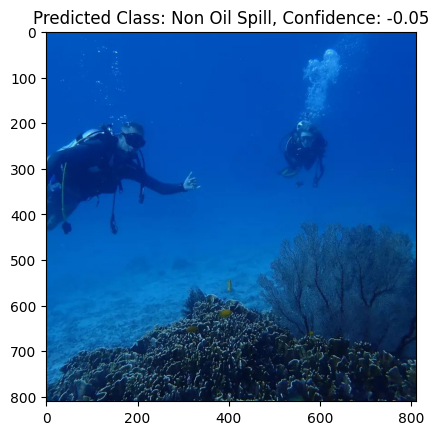

In [ ]:
from PIL import Image
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from google.colab import files

# Upload the image using files.upload()
uploaded = files.upload()

# Get the first uploaded image
uploaded_image_path = next(iter(uploaded.keys()))

# Load the image from the user upload
img = Image.open(uploaded_image_path)

# Define image transformations for the PyTorch model
transform_torch = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Apply the transformations to the image
input_image_torch = transform_torch(img)
input_image_torch = input_image_torch.unsqueeze(0)  # Add batch dimension

# Make predictions with the PyTorch model
with torch.no_grad():
    your_model.eval()
    output_torch = your_model(input_image_torch)

# Process the output as needed (e.g., get class label and confidence)
predicted_class_torch = torch.argmax(output_torch[0]).item()

# Experiment with different confidence thresholds interactively
for confidence_threshold in [0.1]:
    if output_torch[0, predicted_class_torch] > confidence_threshold:
        predicted_label = "Oil Spill"
    else:
        predicted_label = "Non Oil Spill"

    # Display the image and predicted class for the PyTorch model
    plt.imshow(img)
    plt.title(f'Predicted Class: {predicted_label}, Confidence: {output_torch[0, predicted_class_torch]:.2f}')
    plt.show()


Saving IMG_0238.JPG to IMG_0238.JPG


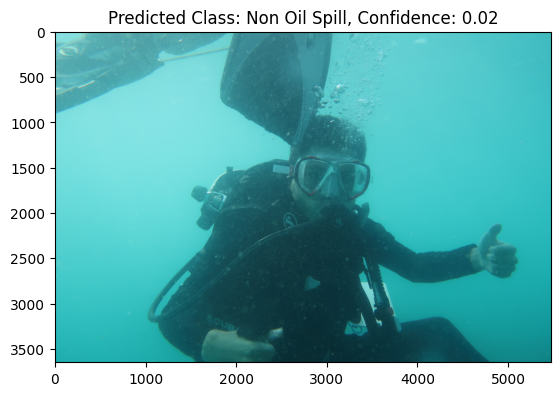

In [ ]:
from PIL import Image
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from google.colab import files

# Upload the image using files.upload()
uploaded = files.upload()

# Get the first uploaded image
uploaded_image_path = next(iter(uploaded.keys()))

# Load the image from the user upload
img = Image.open(uploaded_image_path)

# Define image transformations for the PyTorch model
transform_torch = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Apply the transformations to the image
input_image_torch = transform_torch(img)
input_image_torch = input_image_torch.unsqueeze(0)  # Add batch dimension

# Make predictions with the PyTorch model
with torch.no_grad():
    your_model.eval()
    output_torch = your_model(input_image_torch)

# Process the output as needed (e.g., get class label and confidence)
predicted_class_torch = torch.argmax(output_torch[0]).item()

# Experiment with different confidence thresholds interactively
for confidence_threshold in [0.1]:
    if output_torch[0, predicted_class_torch] > confidence_threshold:
        predicted_label = "Oil Spill"
    else:
        predicted_label = "Non Oil Spill"

    # Display the image and predicted class for the PyTorch model
    plt.imshow(img)
    plt.title(f'Predicted Class: {predicted_label}, Confidence: {output_torch[0, predicted_class_torch]:.2f}')
    plt.show()


In [ ]:
from torchvision import models

# Load a pre-trained model (e.g., ResNet50)
your_model = models.resnet50(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 79.9MB/s]


Saving oulspill.jpg to oulspill (2).jpg


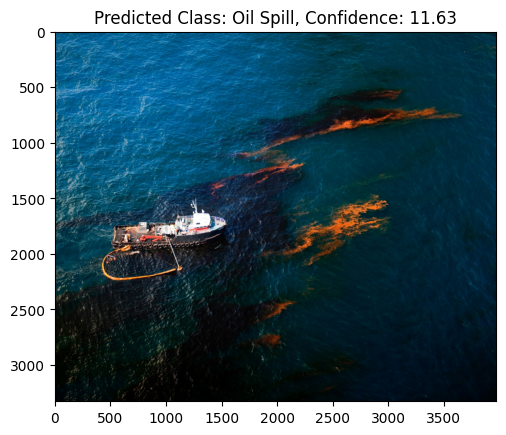

In [ ]:
from PIL import Image
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from google.colab import files

# Upload the image using files.upload()
uploaded = files.upload()

# Get the first uploaded image
uploaded_image_path = next(iter(uploaded.keys()))

# Load the image from the user upload
img = Image.open(uploaded_image_path)

# Define image transformations for the PyTorch model
transform_torch = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Apply the transformations to the image
input_image_torch = transform_torch(img)
input_image_torch = input_image_torch.unsqueeze(0)  # Add batch dimension

# Make predictions with the PyTorch model
with torch.no_grad():
    your_model.eval()
    output_torch = your_model(input_image_torch)

# Process the output as needed (e.g., get class label and confidence)
predicted_class_torch = torch.argmax(output_torch[0]).item()

# Experiment with different confidence thresholds interactively
for confidence_threshold in [0.1]:
    if output_torch[0, predicted_class_torch] > confidence_threshold:
        predicted_label = "Oil Spill"
    else:
        predicted_label = "Non Oil Spill"

    # Display the image and predicted class for the PyTorch model
    plt.imshow(img)
    plt.title(f'Predicted Class: {predicted_label}, Confidence: {output_torch[0, predicted_class_torch]:.2f}')
    plt.show()